In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [49]:
# 1. 데이터 불러오기
df = pd.read_csv('/Users/user/Downloads/abalone.csv')
print(df.head())

   id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0   M   0.455     0.365   0.095        0.5140          0.2245   
1   1   M   0.350     0.265   0.090        0.2255          0.0995   
2   2   F   0.530     0.420   0.135        0.6770          0.2565   
3   3   M   0.440     0.365   0.125        0.5160          0.2155   
4   4   I   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


In [51]:
# 2. 범주형 데이터 인코딩 (Sex 컬럼)
if 'Sex' in df.columns:
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])

In [53]:
# 3. X, y 분리
X = df.drop(columns=['Rings'])  # Rings = 타겟
y = df['Rings']

In [57]:
# 4. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[Linear Regression]
평균제곱근오차: 4.96027593035589


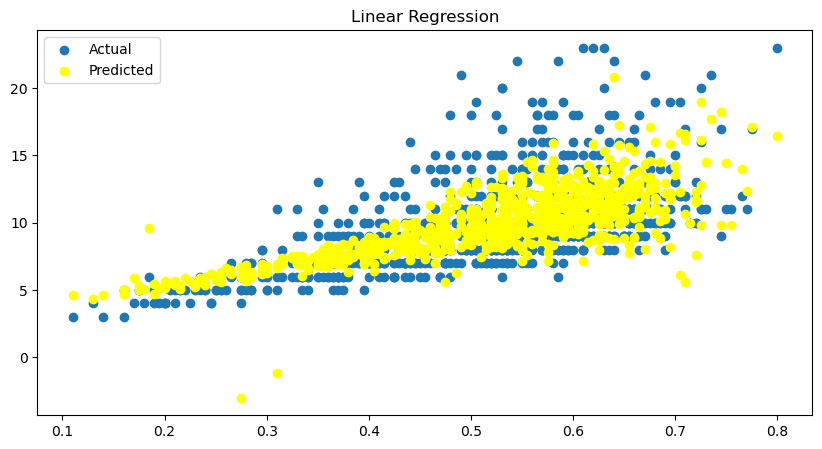

In [59]:
# ========================
# 5. Linear Regression
# ========================
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)
print('\n[Linear Regression]')
print('평균제곱근오차:', mean_squared_error(ly_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='Actual')
plt.scatter(X_test['Length'], ly_preds, color='yellow', label='Predicted')
plt.legend()
plt.title('Linear Regression')
plt.show()


[Decision Tree]
평균제곱근오차: 6.253588516746412


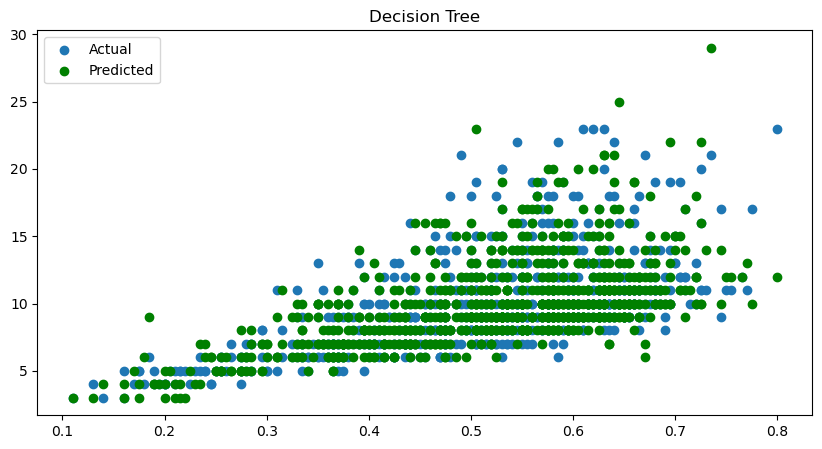

In [61]:
# ========================
# 6. Decision Tree
# ========================
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
dy_preds = model.predict(X_test)
print('\n[Decision Tree]')
print('평균제곱근오차:', mean_squared_error(dy_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='Actual')
plt.scatter(X_test['Length'], dy_preds, color='green', label='Predicted')
plt.legend()
plt.title('Decision Tree')
plt.show()


[Random Forest]
평균제곱근오차: 3.7921660287081345


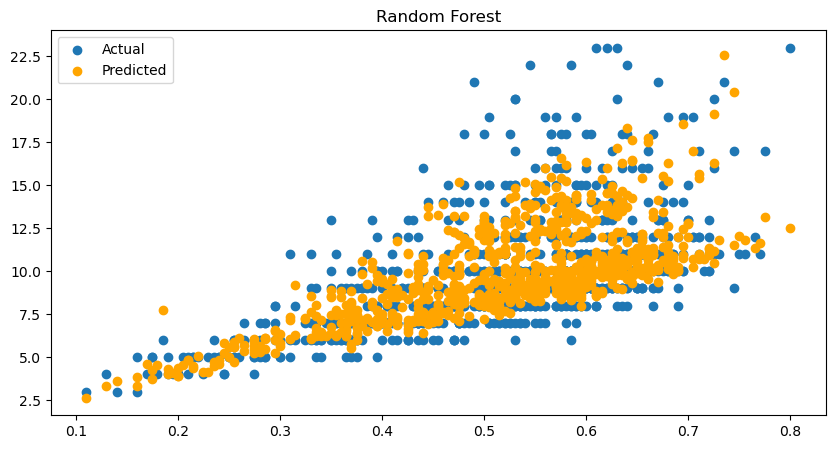

In [63]:
# ========================
# 7. Random Forest
# ========================
model = RandomForestRegressor()
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('\n[Random Forest]')
print('평균제곱근오차:', mean_squared_error(ry_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='Actual')
plt.scatter(X_test['Length'], ry_preds, color='orange', label='Predicted')
plt.legend()
plt.title('Random Forest')
plt.show()

In [69]:
print(X_train.shape, y_train.shape)

(3341, 9) (3341,)



[Support Vector Regressor]
평균제곱근오차: 9.911267999147723


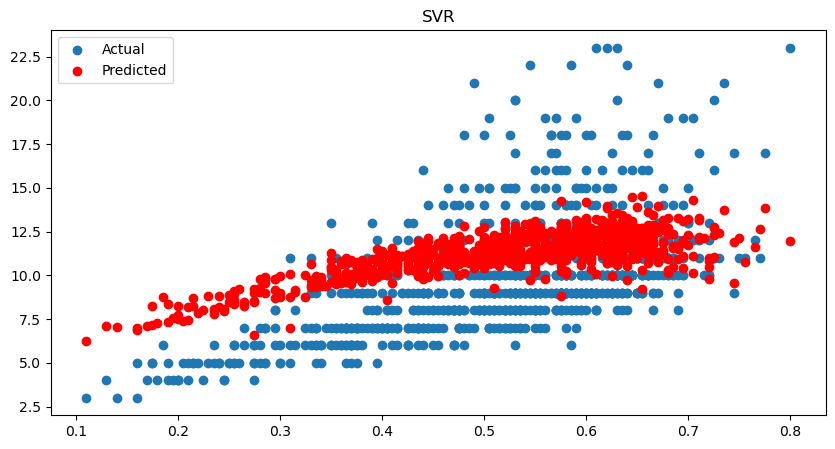

In [71]:
# ========================
# 8. SVM
# ========================
model = SVR(kernel='linear')
model.fit(X_train, y_train)
svr_preds = model.predict(X_test)
print('\n[Support Vector Regressor]')
print('평균제곱근오차:', mean_squared_error(svr_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='Actual')
plt.scatter(X_test['Length'], svr_preds, color='red', label='Predicted')
plt.legend()
plt.title('SVR')
plt.show()